# Running cellpose locally


## installation

Check CUDA version and GPU first

In [1]:
!nvcc --version
!nvidia-smi
%load_ext autoreload
%autoreload 2


import sys
sys.path.insert(1, '/home/kcutler/kevin_utils/')
from kevin import rescale, ncolorlabel, endpoints, getskel

import numpy as np
# import cupy as np
import time, os, sys
from urllib.parse import urlparse
from urllib.parse import urlparse
from cellpose import models

use_GPU = models.use_gpu()
print('>>> GPU activated? %d'%use_GPU)


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89
Thu Jul 15 12:01:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 455.45.01    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  TITAN RTX           On   | 00000000:01:00.0 Off |                  N/A |
| 41%   27C    P8    13W / 280W |   4268MiB / 24217MiB |      0%      Default |
|                               |                      |                  N/A |
+-

Import libraries and check GPU

In [2]:
import time, os, sys
import skimage.io
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
# from cupyx import scipy

# np.abs(np.array([1+1j,1]))
# np.asarray(1)

Download sample images

In [3]:
from pathlib import Path
home = str(Path.home())
# basedir = os.path.join(home,"DataDrive/cellpose_training/x/xytRegister/xy5/tile_7")
# imagenames = ["1_phase","4_phinv_C2"]
# basedir = os.path.join(home,"DataDrive/cellpose_training/testimages")
# imagenames = ['phs_007']
# basedir = os.path.join(home,"DataDrive/tle3/xy1/phase")
# imagenames = ['t05xy01c1']
# basedir = '/home/kcutler/DataDrive/Serratia vs E. coli'
# imagenames = ['T14XY2C1']
basedir = '/home/kcutler/DataDrive/Francisella/multi/'
imagenames = ['xy3c1']
ext = '.tif'
files = [os.path.join(basedir,i+ext) for i in imagenames]
# ext = '.png'



# basedir = os.path.join(home,"DataDrive/test")
# imagenames = [str(i).zfill(3) for i in np.arange(0,67+1,1)]
# # imagenames = [str(i).zfill(3) for i in [5,9,11,15,19,21,66]]
# files = [os.path.join(basedir,i+'_img'+ext) for i in imagenames]
# print(files)


#cellasic
files = ['/home/kcutler/DataDrive/See-Yeun/2-17-2018/FirstHalf/Mut2/12WT_32MutT200XY4C1.tif']

# for paper
files = ['/home/kcutler/DataDrive/PSVB mix/b_t-1xy5c1/tile_16/3_phase.png']
files = ['/home/kcutler/DataDrive/tle1 and tle3 same time intervals/b/b_t032xy2c1.tif']
# crop comparisons, first do mine then do OG
# files = files+['/home/kcutler/DataDrive/Hpylori/test019XY1C1_rescaled_crop.png',
#          '/home/kcutler/DataDrive/PAO1 and staph/XY4/tile_13/3_phase_crop.png',
#          '/home/kcutler/DataDrive/4529 branching/edits/d7_4/2_phase.png']
# # files = ['/home/kcutler/DataDrive/PAO1 and staph/XY4/tile_13/3_phase_crop.png']
# files = files+['/home/kcutler//DataDrive/4529 branching/edits/c4_6/2_phase.png']
# files = files+['/home/kcutler/DataDrive/4529 branching/edits/c3_7/2_phase copy.png']
# files = files+['/home/kcutler/DataDrive/4529 branching/edits/c3_3/2_phase copy.png']
# files = ['/home/kcutler/DataDrive/4529 branching/edits/d7_4/2_phase.png'] #this is a really good one 

# files = ['/home/kcutler/DataDrive/PaulMovies/testing/dnaAmovie_t112c1.tif']
# files = ['/home/kcutler/DataDrive/cephalexin/f/multi/f_t1xy2c1.tif']#cephalexin
# files = ['/home/kcutler/DataDrive/cephalexin/f/multi/xy2tile_15/2_phase.png']#cephalexin
# files = ['/home/kcutler/DataDrive/cephalexin/curvecell.png'] #zoomed in cex 
# files = ['/home/kcutler/DataDrive/cephalexin/f/multi/xy2tile_16/2_phase.png']
# files = ['/home/kcutler/DataDrive/a22/testT12XY5C1.tif'] #A22
# files = ['/home/kcutler/DataDrive/cellpose_training/testimages/phs_006.tif']

# files =['/home/kcutler/DataDrive/4529 branching/d/d_t-1xy3c1.tif'] #aztreonam
# files = ['/home/kcutler/DataDrive/PSVB mix/b/b_t-1xy5c1.tif']
# files = ['/home/kcutler/DataDrive/Francisella/multi/xy3c1.tif']
# files = ['/home/kcutler/DataDrive/vibrio/xytRegister/xy1c1.tif']
# files = ['/home/kcutler/DataDrive/testImages/vibrio_xy1tile10.tif','/home/kcutler/DataDrive/PSVB mix/b/b_t-1xy5c1.tif','/home/kcutler/DataDrive/Francisella/multi/xy3c1.tif']
files = ['/home/kcutler/DataDrive/testImages/vibrio_xy1tile10.tif']
# files = ['/home/kcutler/DataDrive/Francisella/test.tif']
# files = ['/home/kcutler/DataDrive/vibrio/finished/vibrio_xy3_tile1.tif']
# files = ['/home/kcutler/DataDrive/example.png']
# files = files + ['/home/kcutler/DataDrive/cellpose_training/x/xytRegister/xy5/tile_14/1_phase.png']
# files = ['/home/kcutler/DataDrive/tle1/redvsgreen/a/xytRegister/align/a_t01xy1c1.tif']
# files = ['/home/kcutler/DataDrive/PSVB mix/c/c_t-1xy3c1.tif']
# files = ['/home/kcutler/DataDrive/PSVB mix/c/c_xy3_crop1.tif']
# files = ['/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_001C1.tif',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_002C1.tif',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_003C1.tif',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_004C1.tif']
# # files = ['/home/kcutler/DataDrive/vibrio/xy1tile_13/2_phase.png']
# files = files+['/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_002_1/2_phase.png']
# files = files+['/home/kcutler/DataDrive/tle3TIFFs/c1/BFt53xy03c1 copy.tif']

# files = ['/home/kcutler/DataDrive/skelpose_paper/bthaicrop.png',
#          '/home/kcutler/DataDrive/skelpose_paper/mixcrop_gaussfilt.png',
#          '/home/kcutler/DataDrive/skelpose_paper/mixcrop.png']
# files = ['/home/kcutler/DataDrive/skelpose_paper/bthaicrop_inv.png',
#          '/home/kcutler/DataDrive/skelpose_paper/mixcrop_gaussfilt_inv.png']
# files = ['/home/kcutler/DataDrive/skelpose_paper/cellpose_outline/s_phase.png',
#         '/home/kcutler/DataDrive/skelpose_paper/cellpose_outline/s2_phase.png']
# files = ['/home/kcutler/DataDrive/tle3TIFFs/c1/BFt53xy03c1.tif',
#          '/home/kcutler/DataDrive/tle3TIFFs/c1/BFt53xy03c1_inverse.tif']
# files = ['/home/kcutler/DataDrive/skelpose_paper/bthai_inv.png',
#          '/home/kcutler/DataDrive/skelpose_paper/mix_inv.png']
# files = ['/home/kcutler/DataDrive/skelpose_paper/mix_inv.png']

## MIX IMAGES
# ext = '.png'
# basedir = '/home/kcutler/DataDrive/PSVB mix/b_t-1xy5c1/'
# imagenames = [str(i).zfill(0) for i in np.arange(0,16)+1]
# files = [os.path.join(basedir,'tile_'+i+'/'+'3_phase'+ext) for i in imagenames]
# ext = '.tif'
# basedir = '/home/kcutler/DataDrive/PSVB mix/b/xytRegister/'
# imagenames = [str(i).zfill(0) for i in np.arange(5,9)+1]
# files = [os.path.join(basedir,'b_t-1xy'+i+'c1'+ext) for i in imagenames]

# ext = '.png'
# basedir = '/home/kcutler/DataDrive/skelpose_paper/'
# imagenames = [str(i).zfill(0) for i in np.arange(5,9)+1]
# files = [os.path.join(basedir,'mix'+i+'_inv'+ext) for i in imagenames]
# files = ['/home/kcutler/DataDrive/PSVB mix/b/xytRegister/b_t-1xy8c1.tif']
# files = ['/home/kcutler/DataDrive/skelpose_paper/cellpose_untrained/mix.png']
# files = ['/home/kcutler/DataDrive/PSVB mix/c/c_t-1xy5c1.tif']
# files = ['/home/kcutler/DataDrive/PSVB mix/b_t-1xy5c1/tile_6/3_phase.png',
#         '/home/kcutler/DataDrive/PSVB mix/b_t-1xy5c1/tile_1/3_phase.png',
#          '/home/kcutler/DataDrive/PSVB mix/b_t-1xy5c1/tile_10/3_phase.png']

#BT images
# files = ['/home/kcutler/DataDrive/tle3TIFFs/c1/BFt53xy03c1 copy 2.tif',
#          '/home/kcutler/DataDrive/tle3TIFFs/c1/BFt53xy03c1_inverse copy.tif']
# files = ['/home/kcutler/DataDrive/skelpose_paper/bthai.tif']

#combined BT and mix; run the inverse and cyto fist, then the 
# files = ['/home/kcutler/DataDrive/skelpose_paper/bthai_inv.png','/home/kcutler/DataDrive/skelpose_paper/mix2_inv.png']
# files = ['/home/kcutler/DataDrive/skelpose_paper/mix2.png']
# files = ['/home/kcutler/DataDrive/PSVB mix/b/xytRegister/b_t-1xy8c1.tif']
# files = ['/home/kcutler/DataDrive/PSVB mix/b_t-1xy5c1/tile_10/3_phase.png']

# beginning of A22 timelaspe is perfect for small clusters
# files = ['/home/kcutler/DataDrive/a22/testT01XY2C1.tif']
# files = ['/home/kcutler/DataDrive/skelpose_paper/Figure 1/ecoli_phase_1.tif','/home/kcutler/DataDrive/skelpose_paper/Figure 1/ecoli_phase_2.tif']
#now figure 2 
# files = ['/home/kcutler/DataDrive/skelpose_paper/Figure 2/a22.tif',
#             '/home/kcutler/DataDrive/skelpose_paper/Figure 2/caulo.tif',
#             '/home/kcutler/DataDrive/skelpose_paper/Figure 2/cex.png',
#             '/home/kcutler/DataDrive/skelpose_paper/Figure 2/d7_4.png',
#             '/home/kcutler/DataDrive/skelpose_paper/Figure 2/hp_xy6.png']
# basedir = '/home/kcutler/DataDrive/skelpose_paper/Figure 2/Originals'

# files = ['/home/kcutler/DataDrive/cephalexin/f/multi/xy6c1.tif']

# files = ['/home/kcutler/DataDrive/streptomyces/XY05C1.tif']


# basedir = os.path.join(home,"DataDrive/cellpose_training/x/xytRegister/xy5_ps_export/")

## TEST IMAGES
# ext = '.png'
# basedir = os.path.join(home,"DataDrive/test")
# # imagenames = [str(i).zfill(3) for i in np.arange(0,67+1,1)]
# imagenames = [str(i).zfill(3) for i in [67,66,64,63,60,1]]
# files = [os.path.join(basedir,i+'_img'+ext) for i in imagenames]


basedir = '/home/kcutler/DataDrive/20210328 HPYLORI AZ2/multi'
# basedir = '/home/kcutler/DataDrive/20210328 HPYLORI AZ/multi'
basedir = '/home/kcutler/DataDrive/20210328 HPYLORI WT/multi'
# basedir = '/home/kcutler/DataDrive/streptomyces/'
basedir = '/home/kcutler/DataDrive/teresadata/210402_789_IPTG_timelapse_1_2/Pos3'
basedir = '/home/kcutler/DataDrive/teresadata/210403_789_LB_IPTG_timelapse_1_1/Pos4'
basedir = '/home/kcutler/DataDrive/teresadata/phase'
basedir = '/home/kcutler/DataDrive/teresadata/210402_789_IPTG_timelapse_1_1/Pos0/xy1/phase/'
basedir = '/home/kcutler/DataDrive/teresadata/210402_789_IPTG_timelapse_1_1/Pos1/xy2/phase/'
basedir = '/home/kcutler/DataDrive/teresadata/210402_789_IPTG_timelapse_1_1/Pos2/xy3/phase/'   
# basedir = '/home/kcutler/DataDrive/teresadata/210402_789_IPTG_timelapse_1_1/Pos3/xy4/phase/'
basedir = '/home/kcutler/DataDrive/teresadata/210403_789_LB_IPTG_timelapse_1_1/Pos2/'
basedir = '/home/kcutler/DataDrive/teresadata/210402_789_IPTG_timelapse_1_2/'
basedir = '/home/kcutler/DataDrive/teresadata/210326_789_IPTG_timelapse_1_2'


# james images
basedir = '/home/kcutler/RemoteData/1520mCherry/no_skip/xy1/phase/'
basedir = '/home/kcutler/RemoteData/702mCherry/crop/xy1/phase/'
basedir = '/home/kcutler/RemoteData/702mCherry/2021_4_10_cell_702_mcherry/xy1/phase'

#sarah images
basedir = '/home/kcutler/DataDrive/Sarah/4-19-2018/'
# basedir = '/home/kcutler/DataDrive/crop/'

# my ec vs sp images
basedir = '/home/kcutler/DataDrive/ecVSsp/'

# ftsN images
basedir = '/home/kcutler/DataDrive/merge_ftsN/xy1/phase/'

#for paul, murA mutants; bad: 3, 7, 8
#good: 13, 4,5!, 
basedir = '/home/kcutler/DataDrive/murA_crop'
basedir = '/home/kcutler/DataDrive/murA_crop/xy09'



from pathlib import Path
# images = Path(basedir).glob("*C1.tif")
# images = Path(basedir).glob("*BF*.tif")
# images = Path(basedir).rglob("*t001*xy10*.tif")
# images =  Path(basedir).rglob("*488*.tif")
# images =  set(Path(basedir).rglob("*c1*.tif")) - set(Path(basedir).rglob("*flows*")) - set(Path(basedir).rglob("* 20hr*/*"))
# images = Path(basedir).rglob('*2_phase.png')
# images = Path(basedir).glob("*xy02*.tif")
# images = Path(basedir).rglob("*t003*.tif")
# images = Path(basedir).rglob("*c1*.tif")
images = Path(basedir).rglob("*.tif")
files = [str(p) for p in images]

#Cephalexin; could do multiple tiles, but actually the whole xy6 looks good to me 
# files = ['/home/kcutler/DataDrive/cephalexin/f/multi/xy6c1/3_phase.png']

#A22 
# files = ['/home/kcutler/DataDrive/a22/xytRegister/t11xy6c1.tif']

# Branching Mutants 
# files = ['/home/kcutler/DataDrive/4529 branching/edits/d7_5/2_phase.png',
#          '/home/kcutler/DataDrive/4529 branching/edits/d7_4/2_phase.png',
#          '/home/kcutler/DataDrive/4529 branching/edits/d7_2/2_phase.png',
#          '/home/kcutler/DataDrive/4529 branching/edits/d5_5/2_phase.png',
#         '/home/kcutler/DataDrive/4529 branching/edits/d5_4/2_phase.png',
#         '/home/kcutler/DataDrive/4529 branching/edits/c4_4/2_phase.png',
#         '/home/kcutler/DataDrive/4529 branching/edits/c3_8/2_phase.png',
#         '/home/kcutler/DataDrive/4529 branching/edits/c3_7/2_phase.png',
#         '/home/kcutler/DataDrive/4529 branching/edits/c3_5/2_phase.png',
#         '/home/kcutler/DataDrive/4529 branching/edits/c3_4/2_phase.png']; 

# caulobacter frames that were never in the trainignd ataset
# files = ['/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_001_1/2_phase.png',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_002_8/2_phase.png',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_002_9/2_phase.png',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_002_10/2_phase.png',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_003_4/2_phase.png',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_003_5/2_phase.png',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_003_8/2_phase.png',
#         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_004_3/2_phase.png']

# files = ['/home/kcutler/DataDrive/2016_10_19_ftsN/2016_10_19_ftsnt241xy3z1c1.tif']
# files = ['/home/kcutler/DataDrive/2016_10_07_morph/2016_10_07_baylyi/xy20/phase/2016_10_07_baylyixy20c1.tif']
# files = ['/home/kcutler/DataDrive/2016_10_07_morph/2016_10_07_mixed/xy40/phase/2016_10_07_mixedxy40c1.tif']
# files = ['/home/kcutler/DataDrive/teresadata/testimg_MMStack_Pos0.ome.tif']
# files = ['/home/kcutler/DataDrive/teresadata/test_zstack_MMStack_Pos0.ome.tif']
# files = ['/home/kcutler/DataDrive/teresadata/image.png']
# files = ['/home/kcutler/DataDrive/teresadata/img_000000024_BF_gfp_conv_outofpath_000.tif']
# files = ['/home/kcutler/DataDrive/teresadata/image (1).png']
files = ['/home/kcutler/DataDrive/teresadata/img_000000048_BF_gfp_conv_outofpath_000.tif']
files = files+['/home/kcutler/DataDrive/teresadata/210402_789_IPTG_timelapse_1_2/Pos3/img_000000024_BF_gfp_conv_outofpath_000.tif']

# files = ['/home/kcutler/DataDrive/skelpose_paper/Figure 3/hpaz2xy1_10.tif','/home/kcutler/DataDrive/skelpose_paper/Figure 3/hpaz2xy1_21.tif']
# files = ['/home/kcutler/DataDrive/teresadata/img_000000000_BF_gfp_conv_000(1).tif']
# files = ['/home/kcutler/DataDrive/teresadata/img_000000021_BF_gfp(525-30)_30ms_000.tif']
# files = ['/home/kcutler/DataDrive/teresadata/210402_789_IPTG_timelapse_1_2/Pos4/img_000000024_BF_gfp_conv_outofpath_000.tif']
# files = ['/home/kcutler/DataDrive/teresadata/210409_1236_3M9pad_timelapse_1_6/Pos7/img_000000035_BF_gfp(525-30)_30ms_000.tif']
# files = ['/home/kcutler/DataDrive/teresadata/210403_789_LB_IPTG_timelapse_1_1/Pos4/img_000000020_/2_gfp.png']
# files = ['/home/kcutler/DataDrive/murA_crop/xy13/phase/2016_10_25_murat239xy13c1.tif']
# files = ['/home/kcutler/DataDrive/wt002xy01c1.tif']
files = files+['/home/kcutler/DataDrive/testImages/vibrio_xy1tile10.tif']
files = files+['/home/kcutler/DataDrive/teresadata/210409_1236_3M9pad_timelapse_1_6/Pos0/original/xy0t000000035_BF_gfp(525-30)_30ms_000.tif']
files = files+['/home/kcutler/DataDrive/skelpose_train/IPTG_ensemble/IPTG_ensemble_8.tif']
files = files+['/home/kcutler/DataDrive/cephalexin/f/multi/xy2tile_10/2_phase.png']
# files = files+['/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_002_9/2_phase.png'] #<<<< not in trainign dataset, need to put it and others in the test folder with GT masks
# files = ['/home/kcutler/DataDrive/skelpose_train/ensemble/ensemble_3.tif']

# files = ['/home/kcutler/RemoteData/702mCherry/2021_4_10_cell_702_mcherry/xy1/phase/2021_4_10_cell_702_mcherry005t121xy1c1.tif']
# files = files+['/home/kcutler/RemoteData/1520mCherry/no_skip/xy1/phase/2021_3_9_cell_1426+702_mcherry001t121xy1c1.tif']
# files = ['/home/kcutler/DataDrive/5I_crop/xy5/phase/2016-06-16_zstack007t100xy5c1.tif']
# files = ['/home/kcutler/DataDrive/Sarah/4-19-2018/mutafterlbxy01.tif']
# files = ['/home/kcutler/DataDrive/ecVSsp/20210427 Ecoli serratia mut 1to4 20hr 30c/t0xy1c1.tif']

# files = ['/home/kcutler/DataDrive/skelpose_train/registered/HCB15N_002_7_13.tif',
#          '/home/kcutler/DataDrive/skelpose_train/registered/HCB15N_003_1_16.tif',
#          '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_002_9/2_phase.png']
files = files+['/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/img_000000005.tif',
               '/home/kcutler/DataDrive/murA_crop/xy01/phase/2016_10_25_murat200xy01c1.tif',
               '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/streptomyces_XY1_2.tif',
               '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/streptomyces_XY17_3.tif',
               '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/xy5_007.tif',
               '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/bthai_f_t001xy1_tile6.tif']
files = files+['/home/kcutler/DataDrive/skelpose_train/registered/caulobacter_raw/HCB15N_001_2_2.tif',
         '/home/kcutler/DataDrive/caulobacter etc/exported/HCB15N_002_9/2_phase.png',
         '/home/kcutler/DataDrive/4529 branching/edits/d7_4/2_phase.png',
         '/home/kcutler/DataDrive/4529 branching/edits/d7_5/2_phase.png']
files = files+['/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/A22_t12xy5c1_tile_5.tif',
               '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/Hpylori023.tif',
               '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/210402_789_IPTG_timelapse_1_2_Pos4_000000024c1.tif',
               '/home/kcutler/DataDrive/cephalexin/f/multi/xy2tile_10/2_phase.png']
# files = ['/home/kcutler/DataDrive/4529 branching/edits/e4_1/2_phase.png']
print(files)

['/home/kcutler/DataDrive/teresadata/img_000000048_BF_gfp_conv_outofpath_000.tif', '/home/kcutler/DataDrive/teresadata/210402_789_IPTG_timelapse_1_2/Pos3/img_000000024_BF_gfp_conv_outofpath_000.tif', '/home/kcutler/DataDrive/testImages/vibrio_xy1tile10.tif', '/home/kcutler/DataDrive/teresadata/210409_1236_3M9pad_timelapse_1_6/Pos0/original/xy0t000000035_BF_gfp(525-30)_30ms_000.tif', '/home/kcutler/DataDrive/skelpose_train/IPTG_ensemble/IPTG_ensemble_8.tif', '/home/kcutler/DataDrive/cephalexin/f/multi/xy2tile_10/2_phase.png', '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/img_000000005.tif', '/home/kcutler/DataDrive/murA_crop/xy01/phase/2016_10_25_murat200xy01c1.tif', '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/streptomyces_XY1_2.tif', '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/streptomyces_XY17_3.tif', '/home/kcutler/DataDrive/skelpose_train/registered/Non-Ensemble/xy5_007.tif', '/home/kcutler/DataDrive/skelpose_train/registered

20


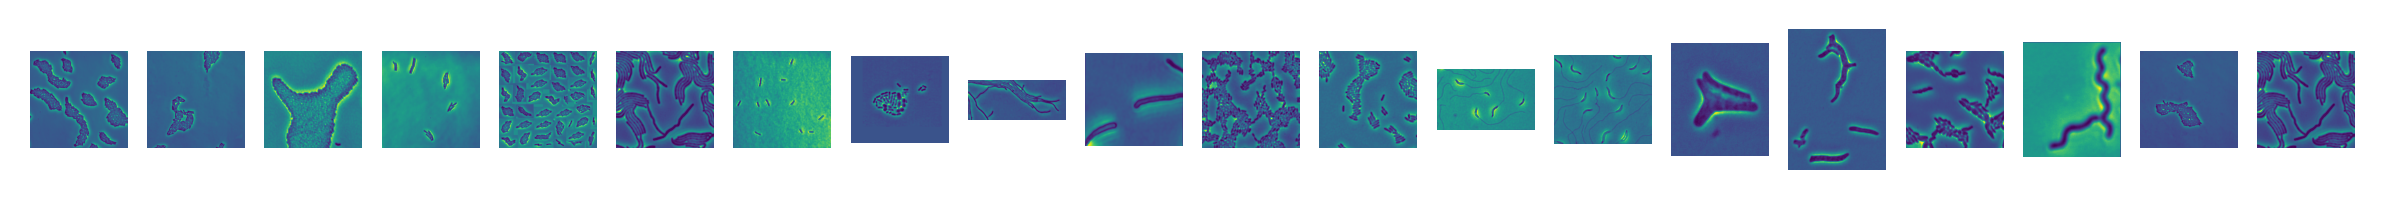

In [4]:
# %matplotlib widget
imgs = [skimage.io.imread(f) for f in files]
nimg = len(imgs)
print(nimg)
from cellpose import transforms
plt.figure(figsize=(10,10))
for k in range(len(imgs)):
    img = transforms.move_min_dim(imgs[k])
    if len(img.shape)>2:
        imgs[k] = img[:,:,0]
    imgs[k] = np.pad(transforms.normalize99(imgs[k]),pad_width=0,mode='median')
    plt.subplot(1,len(files),k+1)
    plt.imshow(imgs[k])
    plt.axis('off')
#     print(img.shape)
#     print(np.percentile(img, 0.01))
#     print(np.percentile(img, 99.99))
#     print(np.max(img))
#     print(np.min(img))

# g = imgs.copy()
# count = 0
# for k,img in enumerate(imgs):
#     for j in [0.1,0.25,0.5,.75,1.5]:
#         count+=1
#         g.append(img**j)
# count
# imgs = g

In [5]:
imgs[0].shape

(512, 512)

In [6]:
# for f in files: 
#     print(f)
#     skimage.io.imread(f)

In [24]:
# RUN CELLPOSE

#best pure skelpose model 
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_05_21_17_07_35.133704'
# model = models.CellposeModel(gpu=use_GPU, pretrained_model=modeldir, net_avg=False, diam_mean=3.,nclasses=3)
# best pure cellpose model
# modeldir = '/home/kcutler/DataDrive/OG_cellpose_train/models/cellpose_residual_on_style_on_concatenation_off_OG_cellpose_train_2021_05_21_20_13_39.711016'
# model = models.CellposeModel(gpu=use_GPU, pretrained_model=modeldir, net_avg=False, diam_mean=3.,nclasses=3)
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_05_27_00_25_43.507410'



# After fix
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/caulobacter_raw/models/cellpose_residual_on_style_on_concatenation_off_caulobacter_raw_2021_07_12_17_56_57.640401_epoch_1999'

modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_12_18_58_32.060029_epoch_901'

modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_12_20_15_25.269176_epoch_201'

#changed weighting to not dip in center, caused less accurate distance field
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_12_20_36_55.689864_epoch_1426'
# things to tty next: go back to binary outline rather than distribution, lower loss rate
#binary boundary:
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_12_22_24_19.215946_epoch_1076'
#1076 was the best, but it eventualyl diverged... possibly corresponding to when I tried using the GPU and got a cuda out of memory error
# try ranger21 again... oscillates a bit, but maybe that's just its algorithm looking around... managed to get back on track
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_13_00_06_52.361847_epoch_251'
#try adabound again:
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_13_00_29_10.457724_epoch_1999'

#back to radam, loss rate 0.1, batch size 32
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_13_10_04_36.712528_epoch_1801'

#same but with border weighting and black cell skeletons
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_13_14_51_25.634074_epoch_1001'

# that doesn't really work, and cannot find a good way to introduce a black skeleton (except maybe by abs divergence...)
# now returning to the normalized field, with mean (not mean of mean) reduction, and discard divergence loss; that seems to be really high relative to the rest

modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_13_16_25_43.583919_epoch_1951'

#now just try training for 4000 epochs, got down to .72 loss, 3901 looks like the best
#There are some places where the reconstruction fails a little bit, but rare 
#3101 is pretty good too, as is 1901 - all in edge cases
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_14_00_25_38.122670_epoch_1501'

#as a last test, I am trying the old inteprolated fields again. I could not get the border reflection to work, so I just changed to border mode back to black padding
# this is ispired by the 'distpose' model working better; not sure if the black field at points of divergence just help the netwropk train better or what
# a more severe change that would bypass all of this would be to just train on distance+boundary, no field; the foeld from the diostance trasnform is super close,
# sometimes better, and maybe it would be even better without optimizing for the flow separately.
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_14_14_36_28.339872_epoch_3401'
#3401 is excellent 
# That's it! Interpolated field is better - not quite at the level of the 'distpose' model, but it will do. Things may look different when compared to the final training dataset, too
modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_15_02_35_51.226115_epoch_3451'

#should also try trainign with pruning on... nw that the bug is fixed


#NOTE: I have not been training a size model, so must use just cellpose model instead of Cellpose. 


#now with the sixe model: 
# sizedir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_05_09_23_04_39.772238_size.npy'
# sizedir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_05_12_17_06_49.373798_size.npy'
# train correlation 0.9 this time on the size model 

# sidedir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_05_13_02_35_25.801270_size.npy' 
# sizemodel = models.SizeModel(cp_model=model, pretrained_size=sizedir)
# #so here is what's happening: the sizemodel was trained with 30 as diam, can't seem to change that 
# sizemodel.diam_mean = 3.

# model = models.CellposeModel(gpu=use_GPU, pretrained_model=modeldir,diam_mean=30.0)
# model = models.Cellpose(gpu=use_GPU, model_type='cyto')

# best distpose:
# modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_05_27_00_25_43.507410' #holy fuckballs it is amazing 
# could it be overfitting? Does fine on murA even though I don't think it even trained on the full murA dataset... could it be the tiled imagescausing the issue? My altered augmentations? It is even
#more uniformly bright 
# also could be the normalization of the field - possible that it focueses too much on the centers and edges and starts optimizing for that instead, though it looks like distpose one was normlaized?
# derivativeweightedless used to essentially square the weights as well 
#MAYBE simplet augmentationsw ere better?????????????



In [25]:
chans = [0,0]
skel = True
rescale = False
diam_mean= 10
nclasses = 4
dist_threshold = 0
if not skel:
    print('running OG')
#     modeldir = '/home/kcutler/DataDrive/skelpose_train/registered/PUREcellpose/models/cellpose_residual_on_style_on_concatenation_off_PUREcellpose_2021_03_30_19_52_50.146222'
    modeldir = '/home/kcutler/DataDrive/OG_cellpose_train/models/cellpose_residual_on_style_on_concatenation_off_OG_cellpose_train_2021_05_21_20_13_39.711016'
    nclasses = 3

model = models.CellposeModel(gpu=use_GPU, pretrained_model=modeldir, net_avg=False, diam_mean=diam_mean, nclasses=nclasses)


2021-07-15 12:17:34,447 [INFO] parsing model string cellpose_residual_on_style_on_concatenation_off_registered_2021_07_15_02_35_51.226115_epoch_3451 to get cellpose options
2021-07-15 12:17:34,464 [INFO] ** TORCH CUDA version installed and working. **
2021-07-15 12:17:34,465 [INFO] >>>> using GPU


In [26]:
n = range(len(imgs))
# n = [3,4,13]
# n = 
if rescale:
    diameters,sd = sizemodel.eval(imgs=imgs,channels=chans)
    print(diameters,sd)
    # diameters =np.array([2.5,2.5,3,2.5,2.4])
    masks, flows, styles = model.eval(imgs,channels=chans,diameter=diameters,dist_threshold=dist_threshold,flow_threshold=0,skel=skel,resample=False)
else:
    masks, flows, styles = model.eval([imgs[i] for i in n],channels=chans,rescale=None,dist_threshold=dist_threshold,flow_threshold=0,upscale_threshold=12,skel=skel,resample=False,verbose=True,tile=True)
# if len(masks)<2:
#     masks = [masks]
#     flows = [flows]
#     styles = [styles]


2021-07-15 12:17:35,615 [INFO] 0%|          | 0/20 [00:00<?, ?it/s]
diameter metric is 11.889559507369995
Rescaling image for flow calculation. Scale factor 3
Using boundary output to split edge defects
2021-07-15 12:17:36,334 [INFO] 5%|5         | 1/20 [00:00<00:13,  1.39it/s]
diameter metric is 11.025996923446655
Rescaling image for flow calculation. Scale factor 3
Using boundary output to split edge defects
2021-07-15 12:17:36,758 [INFO] 10%|#         | 2/20 [00:01<00:11,  1.59it/s]
diameter metric is 13.866089344024658
Using boundary output to split edge defects
2021-07-15 12:17:37,014 [INFO] 15%|#5        | 3/20 [00:01<00:08,  1.93it/s]
diameter metric is 12.053229331970215
Using boundary output to split edge defects
2021-07-15 12:17:37,181 [INFO] 20%|##        | 4/20 [00:01<00:06,  2.42it/s]
diameter metric is 11.49167776107788
Rescaling image for flow calculation. Scale factor 3
Using boundary output to split edge defects
2021-07-15 12:17:38,255 [INFO] 25%|##5       | 5/20 [00:0

In [27]:
# DISPLAY RESULTS
from vispy import scene,app
from vispy import app
import numpy as np
from vispy.io import load_data_file, read_png
clim = [-6,10]
canvas = scene.SceneCanvas(keys='interactive',px_scale=1)
x = 350
nimg = len(masks)
canvas.size = 4*x, nimg*x
canvas.show()
print(canvas.dpi)
grid = canvas.central_widget.add_grid()

from cellpose import plot, transforms, utils
from scipy.ndimage import maximum_filter

dist_threshold = -1
for idx,i in enumerate(n):
    maski = masks[idx]
    print('mask diam metrics',utils.diameters(maski))
    flowi = flows[idx][0]
    disti = flows[idx][2]
    bndri = flows[idx][-1]  
    outlines = utils.masks_to_outlines(maski)
    outY, outX = np.nonzero(outlines)
    img0 = imgs[i].copy()
    if img0.shape[0] < 4:
        img0 = np.transpose(img0, (1,2,0))
    if img0.shape[-1] < 3 or img0.ndim < 3:
        img0 = plot.image_to_rgb(img0, channels=chans)
    else:
        if img0.max()<=50.0:
            img0 = np.uint8(np.clip(img0*255, 0, 1))
    imgout= img0.copy()
    imgout[outY, outX] = np.array([255,0,0]) #pure red 
    

    # Add 3 ViewBoxes to the grid
    b1 = grid.add_view(row=idx, col=0)
    b1.camera = scene.PanZoomCamera(aspect=1)
    b1.border_color = (0.5, 0.5, 0.5, 1)
    b2 = grid.add_view(row=idx, col=1)
    b2.camera = scene.PanZoomCamera(aspect=1)
    b2.border_color = (0.5, 0.5, 0.5, 1)
    b3 = grid.add_view(row=idx, col=2)
    b3.border_color = (0.5, 0.5, 0.5, 1)
    b3.camera = scene.PanZoomCamera(aspect=1)
    b4 = grid.add_view(row=idx, col=3)
    b4.border_color = (0.5, 0.5, 0.5, 1)
    b4.camera = scene.PanZoomCamera(aspect=1)

    # Image visual
    e1 = scene.Node(parent=b1.scene)
    e2 = scene.Node(parent=b2.scene)
    e3 = scene.Node(parent=b3.scene)
    e4 = scene.Node(parent=b4.scene)
#     image1 = scene.visuals.Image(transforms.normalize99(imgs[idx]), parent=b1.scene,cmap='gray')

    image1 = scene.visuals.Image(bndri, parent=b1.scene,clim=clim)
    image2 = scene.visuals.Image(imgout, parent=b2.scene)
    image3 = scene.visuals.Image(flowi, parent=b3.scene)
    image4 = scene.visuals.Image(disti, parent=b3.scene,clim=clim)

    b1.add(image1)
    b1.camera.set_range()
    b1.camera.flip = (0, 1, 0)
    b2.add(image2)
    b3.add(image3)
    b4.add(image4)
    b2.camera = b1.camera
    b3.camera = b1.camera 
    b4.camera = b1.camera
    


VispyWidget(height=7000, width=1400)

96.0
mask diam metrics (13.182837009429932, None)
mask diam metrics (12.260762214660645, None)
mask diam metrics (16.503185749053955, None)
mask diam metrics (13.091431617736816, None)
mask diam metrics (12.919090747833252, None)
mask diam metrics (21.895430088043213, None)
mask diam metrics (13.719869613647461, None)
mask diam metrics (17.181728839874268, None)
mask diam metrics (19.745826244354248, None)
mask diam metrics (26.01632308959961, None)
mask diam metrics (17.884490489959717, None)
mask diam metrics (18.969793796539307, None)
mask diam metrics (9.694561243057251, None)
mask diam metrics (10.056630849838257, None)
mask diam metrics (41.232510566711426, None)
mask diam metrics (32.79337406158447, None)
mask diam metrics (27.85510540008545, None)
mask diam metrics (24.02028465270996, None)
mask diam metrics (12.209608554840088, None)
mask diam metrics (21.895430088043213, None)


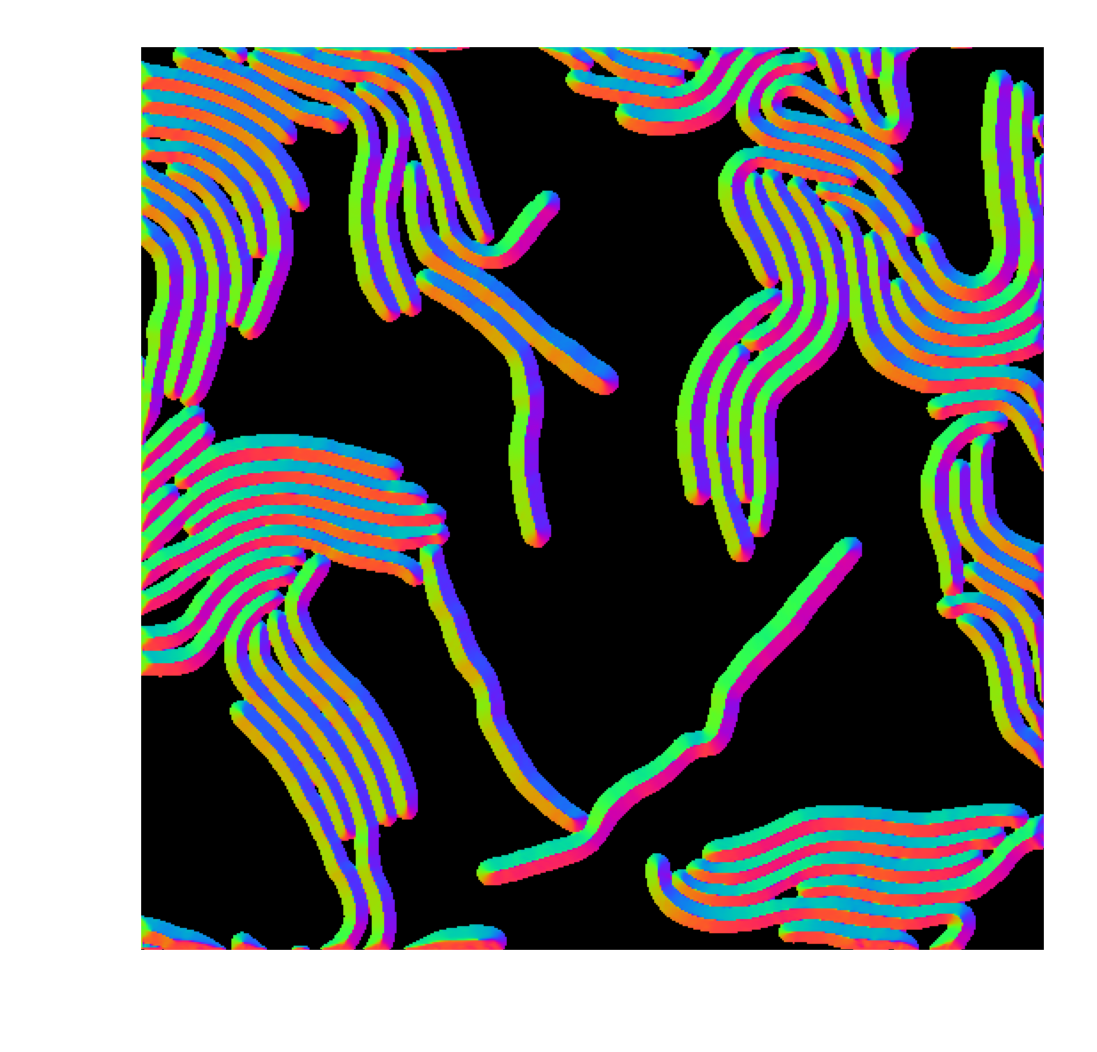

In [23]:
#  n = -2
# info = ['RGB flow','dP','dist','p','bd']
# [print(info[k],np.min(flows[n][k]),np.max(flows[n][k]))for k in range(len(flows[n]))]
# bndri = flows[-12][-1]  
# plt.imshow((1/(1+np.exp(-bndri)))>.3,interpolation='nearest')
n = -1
bndri = flows[n][-1]  
disti = flows[n][2].copy()

mask = disti>=dist_threshold
bdP =(np.stack((np.gradient(disti)))*mask)
mag = np.abs(bdP[1,:,:]+1j*bdP[0,:,:])+1e-8
bdP /= mag
# dx,dy = np.gradient(bndri)
# dx,dy = transforms.normalize_field(dx,dy)
# mu = np.stack((dy,dx))
dd = plot.dx_to_circ(bdP/np.max(bdP))
plt.imshow(dd)


mean dist here 0.99999994


(-0.5, 1535.5, 511.5, -0.5)

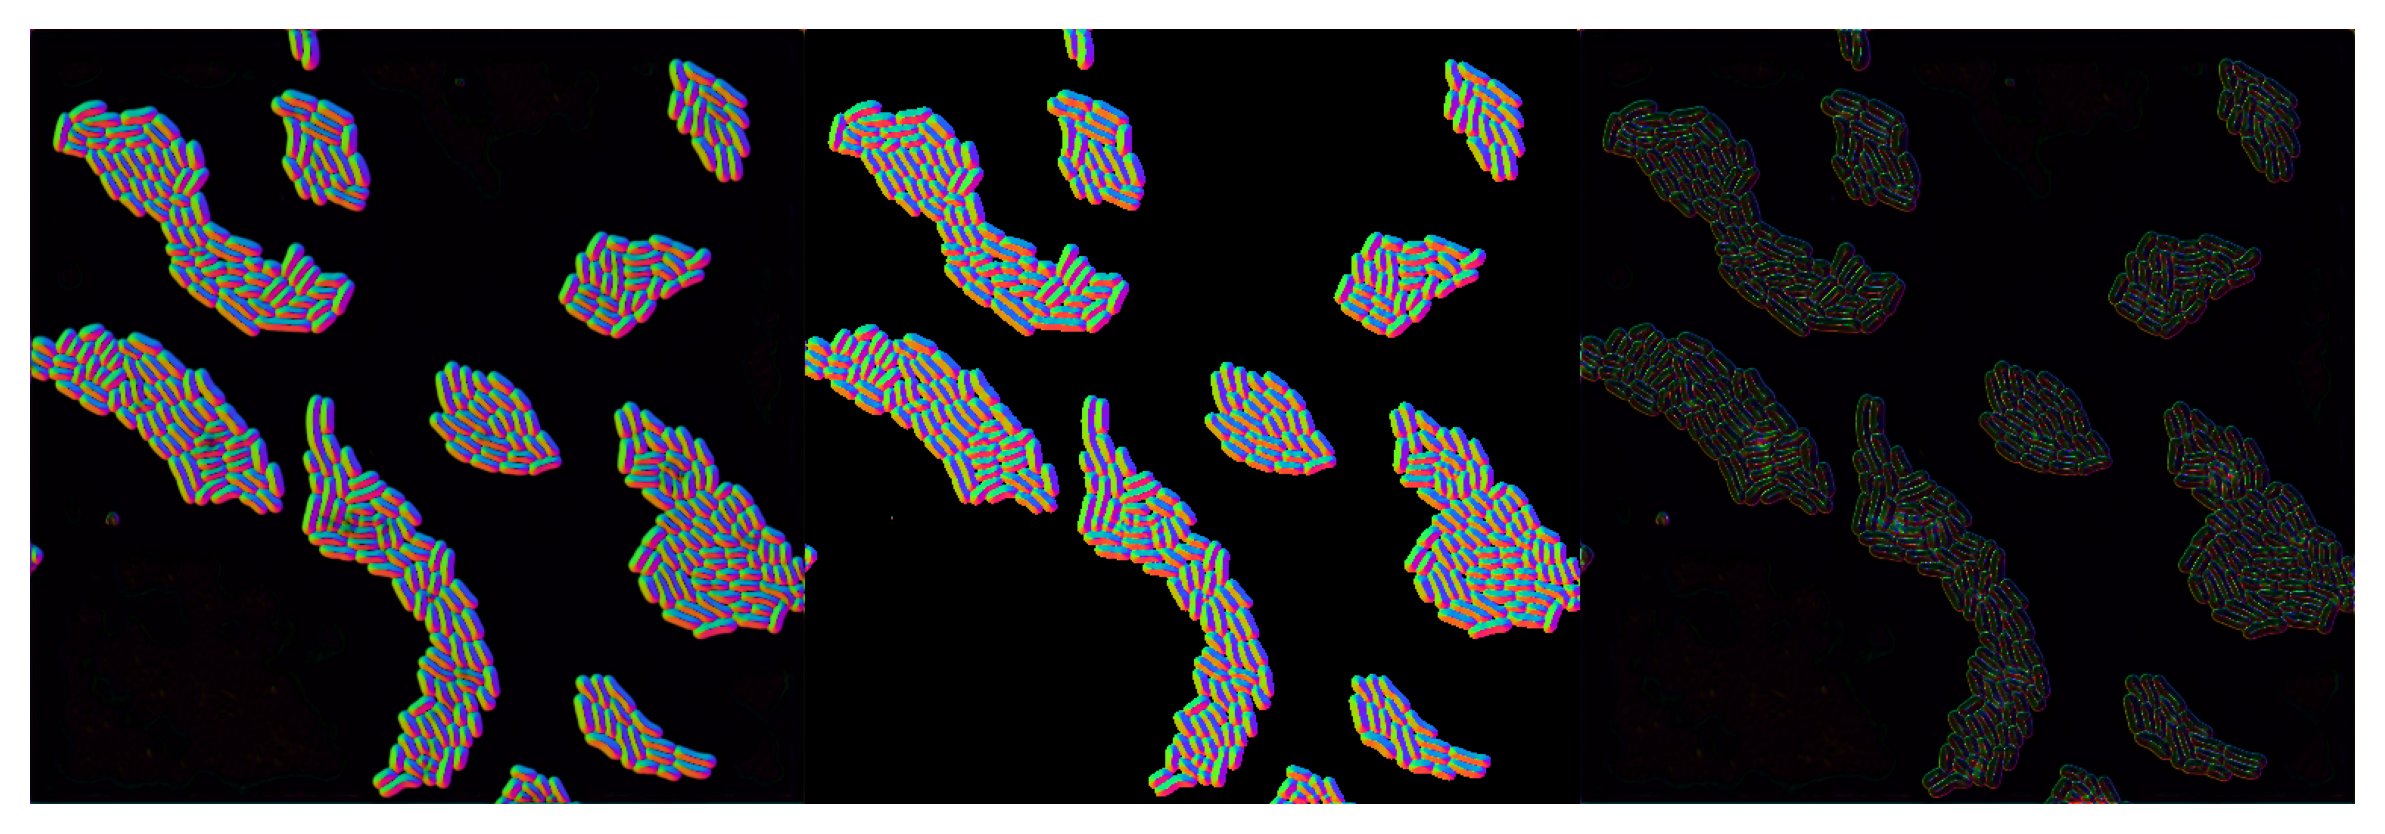

In [73]:
#plt.imshow(probi>-1)
# d = flows[5][2]
# np.mean(d[d<=0])
n = 0
disti = flows[n][2].copy()
mask = disti>=dist_threshold

disti = transforms.normalize_dist(disti,dist_threshold)
dy,dx = np.gradient(disti)
dx = dx*mask
dy = dy*mask
md = np.mean((dx[mask]**2+dy[mask]**2)**0.5)
print('mean dist here',md)
dx,dy = transforms.normalize_field(dx,dy)
mu = np.stack((dy,dx))/md

dP = flows[n][0].copy()
dd = plot.dx_to_circ(mu)
# dx,dy = transforms.normalize_field(dx,dy)
fig = plt.figure(figsize=(10,10))
plt.imshow(np.hstack((dP,dd,np.abs(dP-dd))))
plt.axis('off')

In [ ]:
model_dirs = ['/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_08_21_18_53.477571_epoch_999',
             '/home/kcutler/DataDrive/skelpose_train/registered/models/cellpose_residual_on_style_on_concatenation_off_registered_2021_07_08_19_47_22.713810_epoch_401']
model_list = [models.CellposeModel(gpu=use_GPU, pretrained_model=model_dir, net_avg=False, diam_mean=diam_mean, nclasses=nclasses) for model_dir in model_dirs]
param_list = [model.net.named_parameters() for model in model_list]

dict_params = dict(param_list[0])
merged_model = model_list[0]
model_dict = merged_model.net.state_dict()

for params in param_list:
    for name, param in params:
        if name in dict_params:
            dict_params[name].data.copy_((param.data + dict_params[name].data)/2)
            
model_dict.update(dict_params)
merged_model.net.load_state_dict(model_dict)

In [ ]:
# io.save_masks(imgs, masks, flows, files, skel=skel,save_extras=True,dir_above=True)

# io.imsave('/home/kcutler/DataDrive/tle3TIFFs/d1/align/image_backup/frames/frame53_cp_output.txt',fig)

In [ ]:
from pathlib import Path
basedir = Path(files[0]).parent.parent.absolute()
print(datadir)
os.path.join(basedir,'masks')
# os.path.split(files[0])
print(os.path.splitext(files[0])[0])
basename = os.path.splitext(os.path.basename(files[0]))[0]
print(basename)
print(os.path.join(basedir,'masks',basename + '.tif'))
# Path.is_dir(Path(os.path.join(basedir,'masks')))
os.path.exists(os.path.join(basedir,'masks'))

In [ ]:
if skel:
    OG = ''
else:
    OG = '_OG'

for j in range(len(files)):
    file = files[j][0:-4]
#     io.imsave(file + '_colorflows' + '.tif', flows[n][0])
    flow = flows[j][1]
    io.imsave(file + '_flows' + OG +'.tif', flow)
    cellprob = flows[j][2]
    io.imsave(file +  '_cellprob' + OG +'.tif', cellprob)

In [ ]:
n=-1
name = 'caulotest'
io.imsave('/home/kcutler/DataDrive/test/' + name + '_colorflows' + '.tif', flows[n][0])
flow = flows[n][1]

io.imsave('/home/kcutler/DataDrive/test/' + name + '_flows' + '.tif', flow)
cellprob = flows[n][2]
io.imsave('/home/kcutler/DataDrive/test/' + name + '_cellprob' + '.tif', cellprob)

In [ ]:
'/home/kcutler/DataDrive/test/' + name + '_flows' + '.tif'

In [ ]:
To install: 
pip install -e /home/kcutler/cellpose

In [ ]:
import cv2
io.imsave('/home/kcutler/DataDrive/tle3TIFFs/d1/align/image_backup/frames/frame1_colorflow_skel.tif',cv2.resize((flows[n][0]*255).astype(np.uint8), dsize=(10*cellprob.shape[1],10*cellprob.shape[0]), interpolation=cv2.INTER_NEAREST))
# io.imsave('/home/kcutler/DataDrive/tle3TIFFs/d1/align/image_backup/frames/frame1_flowy_skel.tif',flows[0][1][0,:])
# io.imsave('/home/kcutler/DataDrive/tle3TIFFs/d1/align/image_backup/frames/frame1_flowx_skel.tif',flows[0][1][1,:])
# io.imsave('/home/kcutler/DataDrive/tle3TIFFs/d1/align/image_backup/frames/frame1_cellprob_skel.tif',flows[n][2])


In [ ]:
# import mpld3
# from mpld3 import plugins
# mpl.use('Agg')
# %matplotlib widget
# fig, ax = plt.subplots(figsize=(2, 2))

# im = ax.imshow(maski, zorder=1, interpolation='nearest')

# ax.set_title('An Image', size=1)

# plugins.connect(fig, plugins.Zoom(button=True, enabled=True))
# mpld3.display()


In [ ]:
from cellpose import utils
maski = masks[0]
outlines = utils.masks_to_outlines(maski)
outX, outY = np.nonzero(outlines)


Save masks as color

In [ ]:
# ext = '.png'
# basedir = '/home/kcutler/DataDrive/PSVB mix/b/xytRegister/'
# imagenames = [str(i).zfill(0) for i in np.arange(0,9)+1]
# maskfiles = [os.path.join(basedir,'b_t-1xy'+i+'c1_cp_masks_OG'+ext) for i in imagenames]
# colormaskfiles = [os.path.join(basedir,'b_t-1xy'+i+'c1_cp_masks_color'+ext) for i in imagenames]

# masks = [skimage.io.imread(m) for m in maskfiles]
# nimg = len(imgs)

for k,mask in enumerate(masks):
     io.imsave(colormaskfiles[k], ncolorlabel(mask))


print(files)
# colorlabels = ncolorlabel(masks)

In [ ]:
colorlabels = ncolorlabel(masks[-1])
plt.imshow(colorlabels)

In [ ]:
f = flows[-1][1]
p = f[1]**2+f[0]**2
print(np.ptp(p))
plt.imshow(p)

In [ ]:
#my style matrix is still nonsense... idk what's up 
# diameters = sizemodel.eval(imgs=imgs,styles=styles,channels=[0,0])
diameters,sizediams = sizemodel.eval(imgs=imgs,channels=[0,0])                          
# sizemodel.eval(styles=styles,channels=[0,0])

In [ ]:
# DISPLAY RESULTS
from cellpose import plot
nimg = len(imgs)
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,5))
#     plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=chans,file_name=files[idx]) # for saving output, do NOT turn on until test files in a new folder
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=chans)
    plt.tight_layout()
    plt.show()

In [ ]:
np.any([np.any(np.isnan(img)) for img in imgs])

In [ ]:
plt.imshow(flows[-1][2]>-1)

In [ ]:
from cellpose import metrics
ap,tp,fp,fn = metrics.average_precision(masks_gt, masks)
print(ap.mean(axis=0),tp.mean(axis=0),fp.mean(axis=0),fn.mean(axis=0))  

In [ ]:
[0.69201523 0.43431965 0.06176348] [85.27941  55.72059   7.897059] [ 26.147058  55.705883 103.52941 ] [20.617647 50.17647  98.      ]


fleshy skel after 2000 epochs
    [0.6865814  0.42470372 0.0704051 ] [86.57353  55.75      8.985294] [ 27.779411  58.60294  105.367645] [19.32353  50.14706  96.911766]

skel model after 1000 epochs
    [0.71431315 0.44817194 0.06871743] [87.55882  56.867645  8.691176] [ 24.367647  55.058823 103.23529 ] [18.338236 49.02941  97.20588 ]

fleshy model after 500
    [0.70086116 0.4351905  0.06362038] [85.69118  55.308823  8.029411] [ 27.92647   58.308823 105.588234] [20.205883 50.588234 97.867645]

goal to beat:
    [0.79813635 0.5800909  0.15661529]

In [ ]:
diameters


In [ ]:
from cellpose import metrics
ap,tp,fp,fn = metrics.average_precision(masks_gt, masks_gt)
print(ap.mean(axis=0),tp.mean(axis=0),fp.mean(axis=0),fn.mean(axis=0))  

In [ ]:
maskfiles = ['/home/kcutler/DataDrive/skelpose_train/francisella/f_masks.tif','/home/kcutler/DataDrive/skelpose_train/francisella/f4_masks.tif','/home/kcutler/DataDrive/skelpose_train/francisella/f10_masks.tif']
masks_gt = [skimage.io.imread(f) for f in maskfiles]
diameters = np.array([utils.diameters(m)[0] for m in masks_gt]) 

In [ ]:
cellprob = flows[0][2]
plt.imshow(cellprob)
plt.axis('off')
plt.set_cmap('gray')

In [ ]:
from complex_colormap import max_chroma_colormap

In [ ]:
numel(imgs)

In [ ]:
plt.imshow(masks[0])
plt.axis('off')
plt.set_cmap('gray')

In [ ]:
idx = 1
maski = masks[idx]
flowi = flows[idx][0]
plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=chans) 


In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.figure()
# plt.imshow(np.hstack((lut[lab],lab)))

# %timeit plt.imshow(lab)
plt.axis('off')
colors = np.divide([(0,0,0), (255, 64, 64), (222, 155, 6), (139, 232, 12), (2, 210, 170), (19, 124, 240), (139, 12, 232)],255)
cmap = matplotlib.colors.ListedColormap(colors)
plt.imshow(lut[lab],cmap = cmap)

In [ ]:
colors = np.divide([ (255, 64, 64), (222, 155, 6), (139, 232, 12), (2, 210, 170), (19, 124, 240), (139, 12, 232)],255)
colors[lab]


In [ ]:
(np.random.rand(2,) - .5) 

In [ ]:
scale_range = 4
(1-scale_range/2) + scale_range * np.random.rand()

In [ ]:
Lx = 500
Ly = 500
scale = [0.5]
n = 0
xy = (224,224)
dxy = np.maximum(0, np.array([Lx*scale[n]-xy[1],Ly*scale[n]-xy[0]])) 
dxy = (np.random.rand(2,) - .5) * dxy 
print(dxy,np.random.rand(2,))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
  
a = np.linspace(-3, 3)
A, B = np.meshgrid(a, a)
X = np.exp(-(A**2 + B**2))
figure, (axes1, axes2) = plt.subplots(ncols = 2)
  
colors = np.divide([(0,0,0), (255, 64, 64), (222, 155, 6), (139, 232, 12), (2, 210, 170), (19, 124, 240), (139, 12, 232)],255)

cmap = matplotlib.colors.ListedColormap(colors)
contour = axes2.contourf(A, B, X, cmap = cmap)
figure.colorbar(contour)
  
plt.show()

In [ ]:
basedir = '/home/kcutler/DataDrive/teresadata/210403_789_LB_IPTG_timelapse_1_1/Pos4/finished'
images = Path(basedir).rglob("*masks*.tif")
files = [str(p) for p in images]
print(files)
masks = [skimage.io.imread(f) for f in files]

In [ ]:
colormaskfiles = [os.path.join(basedir,'ncolor_'+str(i)+'.png') for i in [1,11,21,31,41,61,70,71]]
for k,mask in enumerate(masks):
    ncolor = ncolorlabel(mask.astype('int32'))
    io.imsave(colormaskfiles[k], ncolor)


In [ ]:
ncolor.dtype

In [ ]:
files[1][0:-4]

In [ ]:
sizemodel.train()